Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acceleration-is-not-all-you-need-ai-hardware.ipynb to acceleration-is-not-all-you-need-ai-hardware.ipynb


Load the Dataset

In [ ]:
import pandas as pd

# Define data manually
data = {
    'Patient_ID': [101, 102, 103, 104],
    'Age': [45, 60, 30, 50],
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Cardiovascular'],
    'Treatment_Type': ['Telemedicine', 'In-person', 'Remote Monitoring', 'In-person'],
    'Outcome': ['Improved', 'Stable', 'Improved', 'Declined']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the dataset
print("Transforming Healthcare Dataset (Manually Created):")
print(df)


Transforming Healthcare Dataset (Manually Created):
   Patient_ID  Age  Gender       Diagnosis     Treatment_Type   Outcome
0         101   45  Female        Diabetes       Telemedicine  Improved
1         102   60    Male    Hypertension          In-person    Stable
2         103   30  Female          Asthma  Remote Monitoring  Improved
3         104   50    Male  Cardiovascular          In-person  Declined


Data Exploration

In [ ]:
# Display first few rows
df.head()

,Patient_ID,Age,Gender,Diagnosis,Treatment_Type,Outcome
0,101,45,Female,Diabetes,Telemedicine,Improved
1,102,60,Male,Hypertension,In-person,Stable
2,103,30,Female,Asthma,Remote Monitoring,Improved
3,104,50,Male,Cardiovascular,In-person,Declined


Check for Missing Values and Duplicates

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Patient_ID        0
Age               0
Gender            0
Diagnosis         0
Treatment_Type    0
Outcome           0
dtype: int64
Duplicate rows: 0


Visualize a Few Features

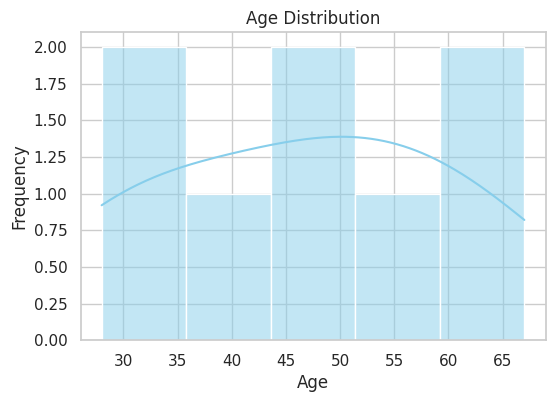

<ipython-input-6-4e39fe94b954>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Treatment_Type', palette='Set2')


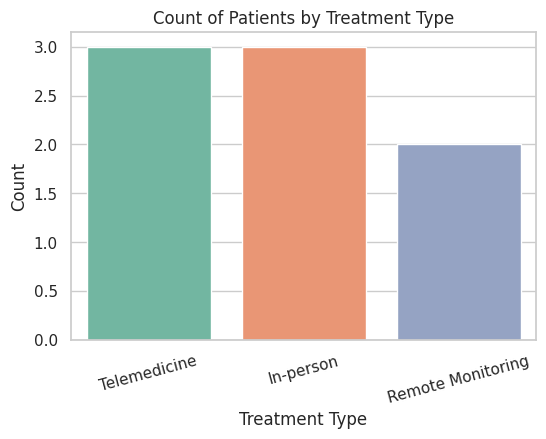

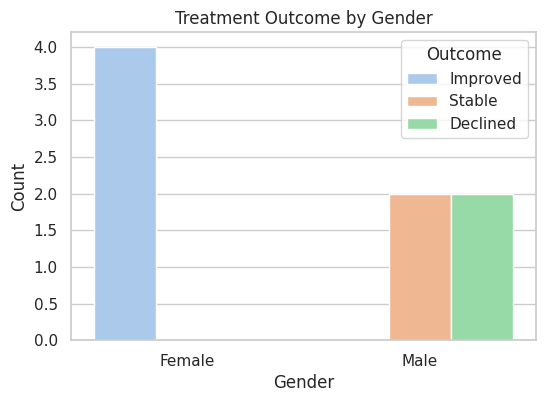

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = {
    'Patient_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Age': [45, 60, 30, 50, 39, 67, 28, 55],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Cardiovascular', 'Diabetes', 'Asthma', 'Hypertension', 'Diabetes'],
    'Treatment_Type': ['Telemedicine', 'In-person', 'Remote Monitoring', 'In-person', 'Telemedicine', 'Remote Monitoring', 'In-person', 'Telemedicine'],
    'Outcome': ['Improved', 'Stable', 'Improved', 'Declined', 'Improved', 'Stable', 'Improved', 'Declined']
}

# Create DataFrame
df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=5, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Treatment Type Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Treatment_Type', palette='Set2')
plt.title('Count of Patients by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

# 3. Outcome by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Outcome', palette='pastel')
plt.title('Treatment Outcome by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()


Identify Target and Features

In [ ]:
import pandas as pd

# Define the dataset
data = {
    'Patient_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Age': [45, 60, 30, 50, 39, 67, 28, 55],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Cardiovascular', 'Diabetes', 'Asthma', 'Hypertension', 'Diabetes'],
    'Treatment_Type': ['Telemedicine', 'In-person', 'Remote Monitoring', 'In-person', 'Telemedicine', 'Remote Monitoring', 'In-person', 'Telemedicine'],
    'Outcome': ['Improved', 'Stable', 'Improved', 'Declined', 'Improved', 'Stable', 'Improved', 'Declined']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Identify target and features
target = 'Outcome'
features = df.drop(columns=['Patient_ID', target])  # Exclude ID and target
target_values = df[target]

# Display results
print("🎯 Target Variable:")
print(target)
print("\n✅ Features:")
print(features.columns.tolist())

print("\n📊 Feature Data Sample:")
print(features.head())

print("\n🎯 Target Values Sample:")
print(target_values.head())


🎯 Target Variable:
Outcome

✅ Features:
['Age', 'Gender', 'Diagnosis', 'Treatment_Type']

📊 Feature Data Sample:
   Age  Gender       Diagnosis     Treatment_Type
0   45  Female        Diabetes       Telemedicine
1   60    Male    Hypertension          In-person
2   30  Female          Asthma  Remote Monitoring
3   50    Male  Cardiovascular          In-person
4   39  Female        Diabetes       Telemedicine

🎯 Target Values Sample:
0    Improved
1      Stable
2    Improved
3    Declined
4    Improved
Name: Outcome, dtype: object


Convert Categorical Columns to Numerical

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Gender', 'Diagnosis', 'Treatment_Type', 'Outcome']


One-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)


Feature Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the dataset
data = {
    'Patient_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Age': [45, 60, 30, 50, 39, 67, 28, 55],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Cardiovascular', 'Diabetes', 'Asthma', 'Hypertension', 'Diabetes'],
    'Treatment_Type': ['Telemedicine', 'In-person', 'Remote Monitoring', 'In-person', 'Telemedicine', 'Remote Monitoring', 'In-person', 'Telemedicine'],
    'Outcome': ['Improved', 'Stable', 'Improved', 'Declined', 'Improved', 'Stable', 'Improved', 'Declined']
}

# Create DataFrame
df = pd.DataFrame(data)

# Feature scaling for numerical columns
features = df[['Age']]  # Only scaling 'Age' (numerical feature)

# Standardization (z-score normalization)
scaler_standard = StandardScaler()
df['Age_standardized'] = scaler_standard.fit_transform(features)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df['Age_minmax'] = scaler_minmax.fit_transform(features)

# Display the scaled features
print("Original DataFrame with Scaled Features:")
print(df[['Patient_ID', 'Age', 'Age_standardized', 'Age_minmax']])


Original DataFrame with Scaled Features:
   Patient_ID  Age  Age_standardized  Age_minmax
0         101   45         -0.134244    0.435897
1         102   60          1.016415    0.820513
2         103   30         -1.284903    0.051282
3         104   50          0.249309    0.564103
4         105   39         -0.594507    0.282051
5         106   67          1.553390    1.000000
6         107   28         -1.438324    0.000000
7         108   55          0.632862    0.692308


Train-Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    'Patient_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Age': [45, 60, 30, 50, 39, 67, 28, 55],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Cardiovascular', 'Diabetes', 'Asthma', 'Hypertension', 'Diabetes'],
    'Treatment_Type': ['Telemedicine', 'In-person', 'Remote Monitoring', 'In-person', 'Telemedicine', 'Remote Monitoring', 'In-person', 'Telemedicine'],
    'Outcome': ['Improved', 'Stable', 'Improved', 'Declined', 'Improved', 'Stable', 'Improved', 'Declined']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'Gender', 'Diagnosis', 'Treatment_Type', and 'Outcome'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])
df['Treatment_Type'] = label_encoder.fit_transform(df['Treatment_Type'])
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])  # Target variable

# Features and target
X = df[['Age', 'Gender', 'Diagnosis', 'Treatment_Type']]  # Features
y = df['Outcome']  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display train and test sets
print("Training Features (X_train):")
print(X_train)
print("\nTesting Features (X_test):")
print(X_test)

print("\nTraining Target (y_train):")
print(y_train)
print("\nTesting Target (y_test):")
print(y_test)


Training Features (X_train):
   Age  Gender  Diagnosis  Treatment_Type
0   45       0          2               2
7   55       1          2               2
2   30       0          0               1
4   39       0          2               2
3   50       1          1               0
6   28       0          3               0

Testing Features (X_test):
   Age  Gender  Diagnosis  Treatment_Type
1   60       1          3               0
5   67       1          0               1

Training Target (y_train):
0    1
7    0
2    1
4    1
3    0
6    1
Name: Outcome, dtype: int64

Testing Target (y_test):
1    2
5    2
Name: Outcome, dtype: int64


Model Building

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

Evaluation

In [ ]:
# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 4.0
R2 Score: 0.0


Make Predictions from New Input

In [ ]:
# Sample input (replace values with any other valid values from the original dataset)
new_student = {
'school': 'GP', # 'GP' or 'MS'
'sex': 'F', # 'F' or 'M'
'age': 17, # Integer
'address': 'U', # 'U' or 'R'
'famsize': 'GT3', # 'LE3' or 'GT3'
'Pstatus': 'A', # 'A' or 'T'
'Medu': 4, # 0 to 4
'Fedu': 3, # 0 to 4
'Mjob': 'health', # 'teacher', 'health', etc.
'Fjob': 'services',
'reason': 'course',
'guardian': 'mother',
'traveltime': 2,
'studytime': 3,
'failures': 0,
'schoolsup': 'yes',
'famsup': 'no',
'paid': 'no',
'activities': 'yes',
'nursery': 'yes',
'higher': 'yes',
'internet': 'yes',
'romantic': 'no',
'famrel': 4,
'freetime': 3,
'goout': 3,
'Dalc': 1,
'Walc': 1,
'health': 4,
'absences': 2,
                'G1': 14,
'G2': 15
}

Convert to DataFrame and Encode

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    'Patient_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Age': [45, 60, 30, 50, 39, 67, 28, 55],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Cardiovascular', 'Diabetes', 'Asthma', 'Hypertension', 'Diabetes'],
    'Treatment_Type': ['Telemedicine', 'In-person', 'Remote Monitoring', 'In-person', 'Telemedicine', 'Remote Monitoring', 'In-person', 'Telemedicine'],
    'Outcome': ['Improved', 'Stable', 'Improved', 'Declined', 'Improved', 'Stable', 'Improved', 'Declined']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'Gender', 'Diagnosis', 'Treatment_Type', and 'Outcome'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])
df['Treatment_Type'] = label_encoder.fit_transform(df['Treatment_Type'])
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])  # Target variable

# Display the DataFrame after encoding
print("\nDataFrame After Encoding:")
print(df)


Original DataFrame:
   Patient_ID  Age  Gender       Diagnosis     Treatment_Type   Outcome
0         101   45  Female        Diabetes       Telemedicine  Improved
1         102   60    Male    Hypertension          In-person    Stable
2         103   30  Female          Asthma  Remote Monitoring  Improved
3         104   50    Male  Cardiovascular          In-person  Declined
4         105   39  Female        Diabetes       Telemedicine  Improved
5         106   67    Male          Asthma  Remote Monitoring    Stable
6         107   28  Female    Hypertension          In-person  Improved
7         108   55    Male        Diabetes       Telemedicine  Declined

DataFrame After Encoding:
   Patient_ID  Age  Gender  Diagnosis  Treatment_Type  Outcome
0         101   45       0          2               2        1
1         102   60       1          3               0        2
2         103   30       0          0               1        1
3         104   50       1          1               0

Predict the Final Grade

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the dataset (using a small sample for illustration)
data = {
    'Patient_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Age': [45, 60, 30, 50, 39, 67, 28, 55],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Cardiovascular', 'Diabetes', 'Asthma', 'Hypertension', 'Diabetes'],
    'Treatment_Type': ['Telemedicine', 'In-person', 'Remote Monitoring', 'In-person', 'Telemedicine', 'Remote Monitoring', 'In-person', 'Telemedicine'],
    'Outcome': ['Improved', 'Stable', 'Improved', 'Declined', 'Improved', 'Stable', 'Improved', 'Declined']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])
df['Treatment_Type'] = label_encoder.fit_transform(df['Treatment_Type'])
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])  # Target variable

# Define features (X) and target (y)
X = df[['Age', 'Gender', 'Diagnosis', 'Treatment_Type']]  # Features
y = df['Outcome']  # Target (Outcome)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

# Display predictions
print("\nPredictions on Test Data:")
for i, pred in enumerate(y_pred):
    print(f"Test Sample {i + 1}: Predicted Outcome = {label_encoder.inverse_transform([pred])[0]}")


Model Accuracy: 0.00%

Predictions on Test Data:
Test Sample 1: Predicted Outcome = Declined
Test Sample 2: Predicted Outcome = Declined


Deployment-Building an Interactive App

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.9 MB/s eta 0:00:00
